### Cats and Dog Classifier Using Convolutional Neural Network

PS: This notebook was code on Google Colab
The dataset can be downloaded from: https://www.kaggle.com/chetankv/dogs-cats-images

In [1]:
#If you are running this notebook on your local PC, no need to run this cell
#Running on Google Colab, make sure your dataset is on your google drive

#Mount your google drive by running this cell

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf 
import numpy as np

import matplotlib.pyplot as plt  

from tensorflow.keras import models, layers

In [3]:
#Data input pipeline and data preprocessing

img_size=225
batch_size=100

dt=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Dog_Cat_Classifier_Tf/dataset" #Here change this link, put the link corresponding to dataset directory on your local machine or google drive,
    shuffle=True,
    batch_size=batch_size,
    image_size=(img_size, img_size),
    color_mode='grayscale'
  
)

Found 10000 files belonging to 2 classes.


In [4]:
#Class names

class_names=dt.class_names

print(class_names)
print(len(dt))




['cats', 'dogs']
100


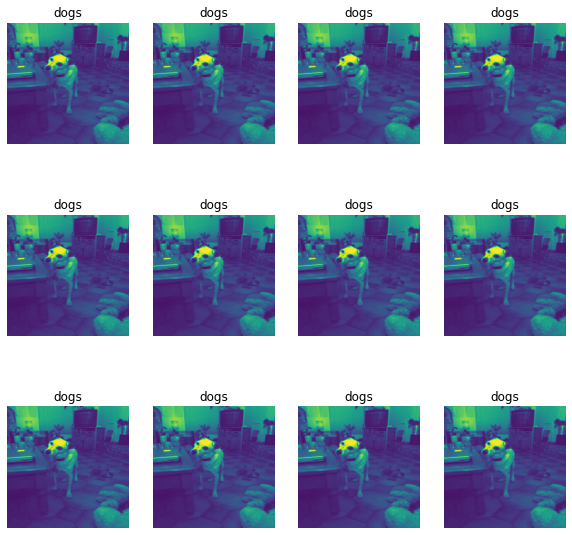

In [5]:
#displaying sample imgs
plt.figure(figsize=(10,10))
for img_batch, label_batch in dt.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(np.squeeze(img_batch[0].numpy().astype("uint8")))
        plt.axis("off")
        plt.title(class_names[label_batch[0]])

In [6]:
#function to split the dataset into train and testing
def split_dt(ds,train_split=0.95, test_split=0.05, shuffle=True, shuffle_size=1000):
     assert(train_split + test_split)==1
     
     ds_size=len(ds)
     
     if shuffle:
         ds=ds.shuffle(shuffle_size, seed=12)
     train_size=int(train_split* ds_size)
     test_size=int(test_split* ds_size)
     
     train_ds= ds.take(train_size)
     test_ds= ds.take(test_size)
     
     return train_ds, test_ds

In [7]:
train_ds, test_ds=split_dt(dt)


In [8]:
print(len(train_ds))
print(len(test_ds))

95
5


In [9]:
#Building the model

#This neural network accepts images of 225 by 225
#the resize_to_rescale function serves purpose for image resizing or rescaling

resize_rescale= tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(img_size, img_size),
        layers.experimental.preprocessing.Rescaling(1.0/225)
    ]
)


#model architechture
num_classes=2
channels=1
input_shape=(batch_size,img_size,img_size,channels)


model=models.Sequential(
    [
        resize_rescale,
        layers.Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
        
        
        
        
    ]
)

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (100, 225, 225, 1)        0         
                                                                 
 conv2d (Conv2D)             (100, 223, 223, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (100, 111, 111, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (100, 109, 109, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (100, 54, 54, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (100, 52, 52, 64)        

In [10]:
#model compilation and training
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history=model.fit(
    train_ds,
    epochs=10,
    batch_size=batch_size
   
    
)

Epoch 1/10
95/95 [==============================] - 59s 267ms/step - loss: 0.6855 - accuracy: 0.5387
Epoch 2/10
95/95 [==============================] - 46s 267ms/step - loss: 0.6424 - accuracy: 0.6226
Epoch 3/10
95/95 [==============================] - 46s 267ms/step - loss: 0.5827 - accuracy: 0.6918
Epoch 4/10
95/95 [==============================] - 45s 267ms/step - loss: 0.4939 - accuracy: 0.7648
Epoch 5/10
95/95 [==============================] - 46s 267ms/step - loss: 0.4388 - accuracy: 0.7986
Epoch 6/10
95/95 [==============================] - 46s 268ms/step - loss: 0.3588 - accuracy: 0.8439
Epoch 7/10
95/95 [==============================] - 46s 268ms/step - loss: 0.3016 - accuracy: 0.8721
Epoch 8/10
95/95 [==============================] - 46s 268ms/step - loss: 0.2594 - accuracy: 0.8918
Epoch 9/10
95/95 [==============================] - 46s 269ms/step - loss: 0.2021 - accuracy: 0.9153
Epoch 10/10
95/95 [==============================] - 46s 270ms/step - loss: 0.1666 - accura

In [11]:
scores=model.evaluate(test_ds)

5/5 [==============================] - 22s 115ms/step - loss: 0.1194 - accuracy: 0.9540


Running prediction on first sample image
Actual label: cats
Predicted Label:  cats


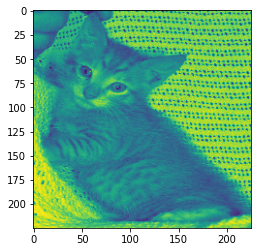

In [12]:
#runing prediction on first sample image

import numpy as np

for image_batch,labels_batch in test_ds.take(1):
    image=image_batch[0].numpy().astype('uint8')
    label=labels_batch[0].numpy()
    
    print('Running prediction on first sample image')
    plt.imshow(np.squeeze(image))
    print("Actual label:",class_names[label])
    
    batch_pred=model.predict(image_batch)
    
    print("Predicted Label: ",class_names[np.argmax(batch_pred[0])])

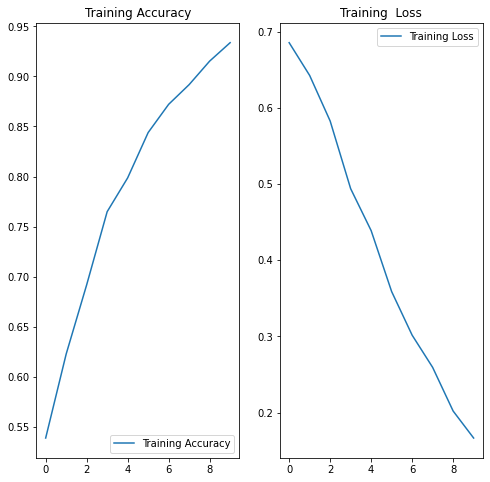

In [13]:
#visualising the training loss and accuracy over 10epochs


acc=history.history['accuracy']
loss=history.history['loss']
epochs=10
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc,label='Training Accuracy')

plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs),loss, label='Training Loss')


plt.legend(loc='upper right')
plt.title('Training  Loss')

plt.show()

In [14]:
#Building function for model inference

def predict(model, img):
    img_arr=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_arr=tf.expand_dims(img_arr,0)
    
    predictions= model.predict(img_arr)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence= round(1000*(np.max(predictions[0])),2)
    
    return predicted_class, confidence
    

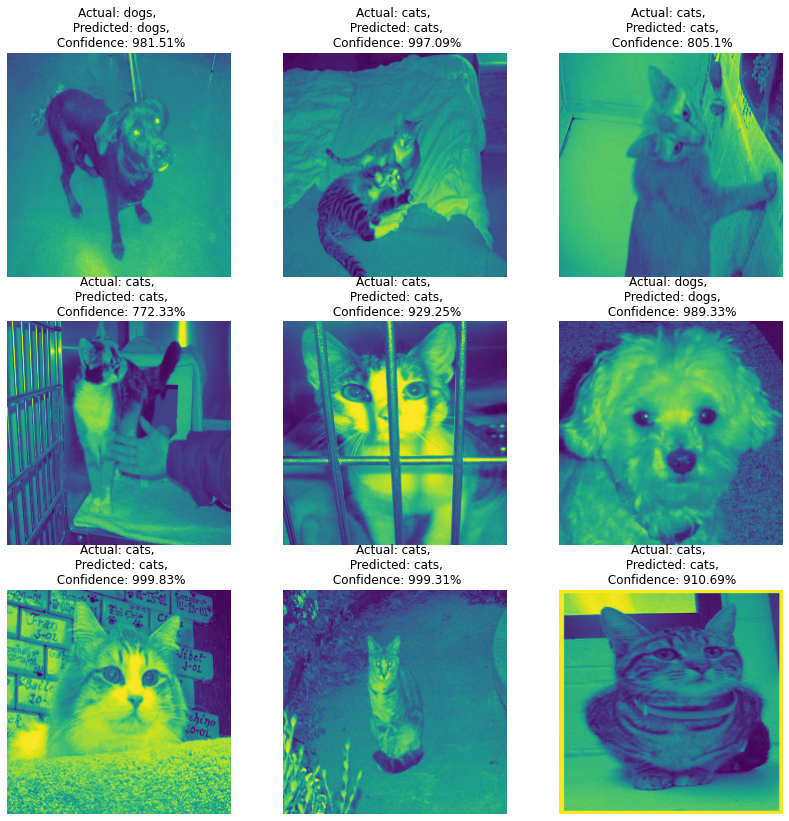

In [15]:
#run the func on certain images

plt.figure(figsize=(14,14))
for images, labels, in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')))
        
        predicted_class, confidence= predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class},\n Confidence: {confidence}%")
        
        plt.axis('off')